<a href="https://colab.research.google.com/github/jodiaz04/Machine-learning---proyectos-/blob/main/solucion_act_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Johan Diaz,
Julian Suarez,
Natalia Arcila

In [2]:
pip install wooldridge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 18.8 MB/s eta 0:00:00


In [126]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import numpy as np

In [68]:
upload= files.upload()

Saving activity_1_ml.xlsx to activity_1_ml (1).xlsx


In [191]:
pgn = pd.read_excel("/content/activity_1_ml.xlsx")

In [192]:
pgn

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,MARRIED,2
1,3.50,2,female,alone,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
547,3.00,9,male,NaN,0
548,7.63,8,female,single,4
549,4.50,36,female,married,6
550,NaN,28,male,married,3


In [193]:
pgn.duplicated().sum()

17

In [194]:
pgn.drop_duplicates(inplace=True)
pgn.reset_index(drop=True, inplace=True)

In [195]:
pgn.duplicated().sum()

0

In [196]:
pgn

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,MARRIED,2
1,3.50,2,female,alone,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
530,2.90,1,male,single,2
531,3.25,14,female,married,2
532,7.63,8,female,single,4
533,NaN,28,male,married,3


In [197]:
pgn["FAM_STATUS"].unique()

array(['MARRIED', 'alone', 'single', 'married', nan, 'SINGLE'],
      dtype=object)

In [198]:
dictio_correct = {"MARRIED":"MARRIED",
"alone":" SINGLE",
"SINGLE":"SINGLE",
"single":"SINGLE",
"married":"MARRIED"}

In [199]:
pgn["FAM_STATUS"]= pgn["FAM_STATUS"].map(dictio_correct)

In [201]:
pgn["FAM_STATUS"].unique()

array(['MARRIED', ' SINGLE', 'SINGLE', nan], dtype=object)

In [140]:
pgn

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,MARRIED,2
1,3.50,2,female,SINGLE,0
2,3.30,5,female,SINGLE,0
3,5.00,15,male,MARRIED,5
4,11.25,28,male,MARRIED,25
...,...,...,...,...,...
530,2.90,1,male,SINGLE,2
531,3.25,14,female,MARRIED,2
532,7.63,8,female,SINGLE,4
533,NaN,28,male,MARRIED,3


In [202]:
pgn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        474 non-null    float64
 1   EXPER       535 non-null    int64  
 2   GENDER      532 non-null    object 
 3   FAM_STATUS  454 non-null    object 
 4   TENURE      535 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 21.0+ KB


In [203]:
pgn.duplicated().sum()

2

In [204]:
pgn.drop_duplicates(inplace=True)
pgn.reset_index(drop=True, inplace=True)

In [205]:
pgn.duplicated().sum()

0

In [206]:
pgn

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,MARRIED,2
1,3.50,2,female,SINGLE,0
2,3.30,5,female,SINGLE,0
3,5.00,15,male,MARRIED,5
4,11.25,28,male,MARRIED,25
...,...,...,...,...,...
528,2.90,1,male,SINGLE,2
529,3.25,14,female,MARRIED,2
530,7.63,8,female,SINGLE,4
531,NaN,28,male,MARRIED,3


In [207]:
pgn["GENDER"].unique()

array(['male', 'female', 'MALE', 'FEMALE', 'man', 'woman', nan],
      dtype=object)

In [209]:
dictio_correct = {"male":"MALE",
"man":" MALE",
"MALE":"MALE",
"female":"FEMALE",
"woman":"FEMALE",
"FEMALE":"FEMALE"}

In [210]:
pgn["GENDER"]= pgn["GENDER"].map(dictio_correct)

In [211]:
pgn["GENDER"].unique()

array(['MALE', 'FEMALE', ' MALE', nan], dtype=object)

In [150]:
pgn

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,MALE,MARRIED,2
1,3.50,2,FEMALE,SINGLE,0
2,3.30,5,FEMALE,SINGLE,0
3,5.00,15,MALE,MARRIED,5
4,11.25,28,MALE,MARRIED,25
...,...,...,...,...,...
528,2.90,1,MALE,SINGLE,2
529,3.25,14,FEMALE,MARRIED,2
530,7.63,8,FEMALE,SINGLE,4
531,NaN,28,MALE,MARRIED,3


In [151]:
pgn.duplicated().sum()

1

In [152]:
pgn.drop_duplicates(inplace=True)
pgn.reset_index(drop=True, inplace=True)

In [153]:
pgn.drop_duplicates(inplace=True)
pgn.reset_index(drop=True, inplace=True)

In [154]:
pgn.duplicated().sum()

0

In [155]:
pgn

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,MALE,MARRIED,2
1,3.50,2,FEMALE,SINGLE,0
2,3.30,5,FEMALE,SINGLE,0
3,5.00,15,MALE,MARRIED,5
4,11.25,28,MALE,MARRIED,25
...,...,...,...,...,...
527,2.90,1,MALE,SINGLE,2
528,3.25,14,FEMALE,MARRIED,2
529,7.63,8,FEMALE,SINGLE,4
530,NaN,28,MALE,MARRIED,3


In [156]:
pgn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        472 non-null    float64
 1   EXPER       532 non-null    int64  
 2   GENDER      529 non-null    object 
 3   FAM_STATUS  451 non-null    object 
 4   TENURE      532 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 20.9+ KB


In [157]:
def funcion2(row):
  GENDER = row["GENDER"]
  if GENDER == 1:
    return "uno"
  return GENDER

In [158]:
pgn["GENDER"] = pgn.apply(funcion2, axis=1)

In [159]:
pgn["GENDER"]=pgn["GENDER"].astype(str)

In [160]:
def funcion2(row):
  pgn = row["FAM_STATUS"]
  if pgn == 1:
    return "uno"
  return pgn

In [161]:
pgn["FAM_STATUS"] = pgn.apply(funcion2, axis=1)

In [162]:
pgn["FAM_STATUS"]=pgn["FAM_STATUS"].astype(str)

In [163]:
pgn["FAM_STATUS"].unique()

array(['MARRIED', ' SINGLE', 'SINGLE', 'nan'], dtype=object)

In [164]:
pgn["FAM_STATUS"].unique()

array(['MARRIED', ' SINGLE', 'SINGLE', 'nan'], dtype=object)

In [165]:
pgn["FAM_STATUS"]=pgn["FAM_STATUS"].astype(str)

In [166]:
pgn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        472 non-null    float64
 1   EXPER       532 non-null    int64  
 2   GENDER      532 non-null    object 
 3   FAM_STATUS  532 non-null    object 
 4   TENURE      532 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 20.9+ KB


In [167]:
pgn.isna().sum()

WAGE          60
EXPER          0
GENDER         0
FAM_STATUS     0
TENURE         0
dtype: int64

In [168]:
pgn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        472 non-null    float64
 1   EXPER       532 non-null    int64  
 2   GENDER      532 non-null    object 
 3   FAM_STATUS  532 non-null    object 
 4   TENURE      532 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 20.9+ KB


In [169]:
pgn.isna().sum()

WAGE          60
EXPER          0
GENDER         0
FAM_STATUS     0
TENURE         0
dtype: int64

In [170]:
pgn

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,MALE,MARRIED,2
1,3.50,2,FEMALE,SINGLE,0
2,3.30,5,FEMALE,SINGLE,0
3,5.00,15,MALE,MARRIED,5
4,11.25,28,MALE,MARRIED,25
...,...,...,...,...,...
527,2.90,1,MALE,SINGLE,2
528,3.25,14,FEMALE,MARRIED,2
529,7.63,8,FEMALE,SINGLE,4
530,NaN,28,MALE,MARRIED,3


In [171]:
pgn_con_valores_predeterminados = pgn.fillna(0)


In [172]:
pgn

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,MALE,MARRIED,2
1,3.50,2,FEMALE,SINGLE,0
2,3.30,5,FEMALE,SINGLE,0
3,5.00,15,MALE,MARRIED,5
4,11.25,28,MALE,MARRIED,25
...,...,...,...,...,...
527,2.90,1,MALE,SINGLE,2
528,3.25,14,FEMALE,MARRIED,2
529,7.63,8,FEMALE,SINGLE,4
530,NaN,28,MALE,MARRIED,3


In [173]:
valores_predeterminados = {'columna1': np.NaN, 'columna3': np.NaN, 'columna4': np.NaN}

In [174]:
pgn_con_valores_predeterminados = pgn.fillna(valores_predeterminados)

In [175]:
pgn

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,MALE,MARRIED,2
1,3.50,2,FEMALE,SINGLE,0
2,3.30,5,FEMALE,SINGLE,0
3,5.00,15,MALE,MARRIED,5
4,11.25,28,MALE,MARRIED,25
...,...,...,...,...,...
527,2.90,1,MALE,SINGLE,2
528,3.25,14,FEMALE,MARRIED,2
529,7.63,8,FEMALE,SINGLE,4
530,NaN,28,MALE,MARRIED,3


In [176]:
media_columna = pgn['WAGE'].mean()

In [177]:
pgn['WAGE'] = pgn['WAGE'].fillna(media_columna)

In [178]:
pgn

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00000,3,MALE,MARRIED,2
1,3.50000,2,FEMALE,SINGLE,0
2,3.30000,5,FEMALE,SINGLE,0
3,5.00000,15,MALE,MARRIED,5
4,11.25000,28,MALE,MARRIED,25
...,...,...,...,...,...
527,2.90000,1,MALE,SINGLE,2
528,3.25000,14,FEMALE,MARRIED,2
529,7.63000,8,FEMALE,SINGLE,4
530,5.92375,28,MALE,MARRIED,3


In [179]:
pgn.isna().sum()

WAGE          0
EXPER         0
GENDER        0
FAM_STATUS    0
TENURE        0
dtype: int64

<Axes: xlabel='WAGE', ylabel='Count'>

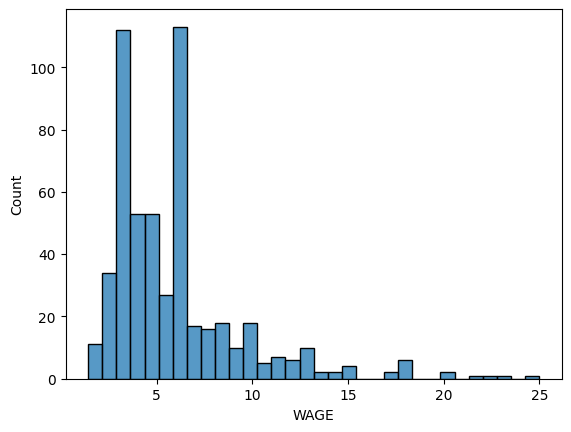

In [181]:
sns.histplot(x=pgn['WAGE'])

<Axes: xlabel='EXPER', ylabel='Count'>

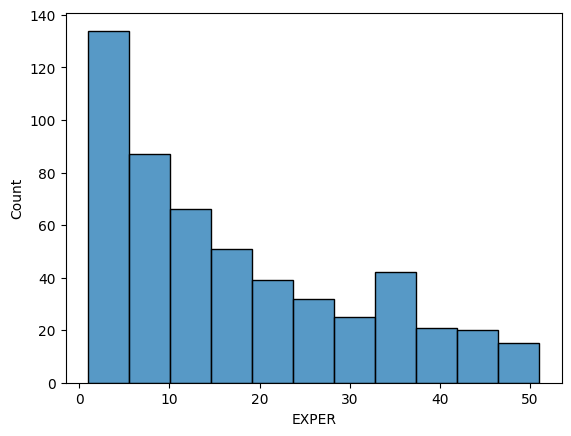

In [184]:
sns.histplot(x=pgn['EXPER'])

<Axes: xlabel='TENURE', ylabel='Count'>

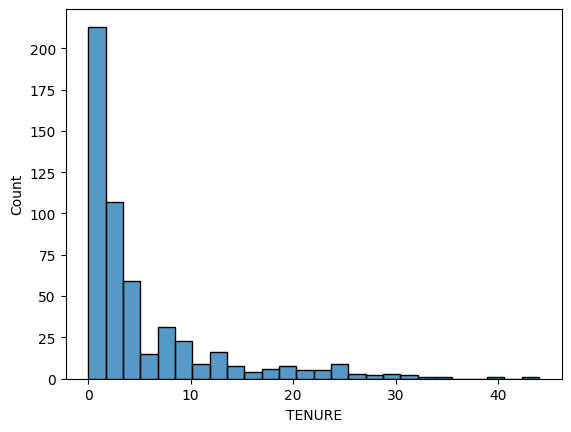

In [185]:
sns.histplot(x=pgn['TENURE'])

<Axes: xlabel='EXPER', ylabel='WAGE'>

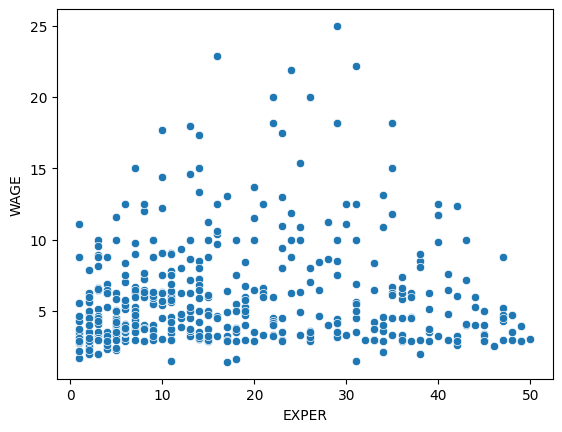

In [225]:
sns.scatterplot(data=pgn, y='WAGE', x="EXPER")

<Axes: xlabel='TENURE', ylabel='WAGE'>

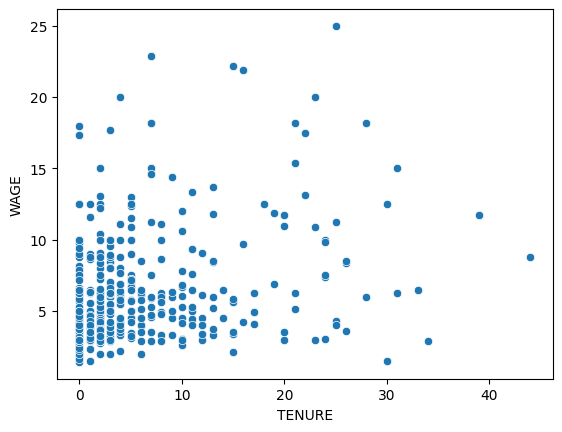

In [226]:
sns.scatterplot(data=pgn, y='WAGE', x='TENURE')

<Axes: xlabel='GENDER', ylabel='WAGE'>

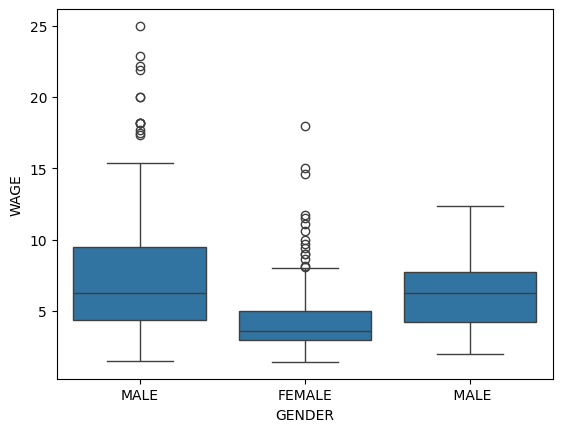

In [227]:
sns.boxplot(data=pgn, y='WAGE', x="GENDER")

<Axes: xlabel='FAM_STATUS', ylabel='WAGE'>

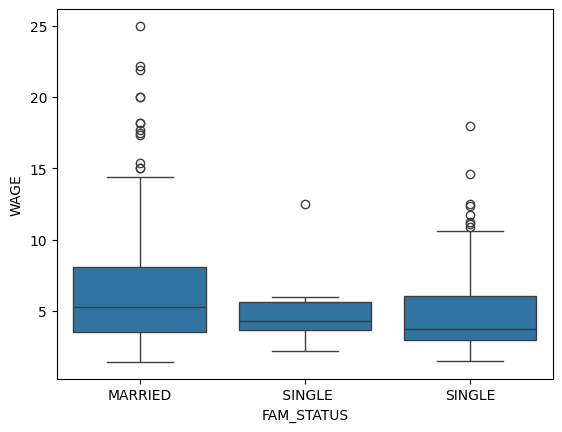

In [229]:
sns.boxplot(data=pgn, y='WAGE', x="FAM_STATUS")